# Fake News Classifier Using LSTM

Dataset: https://github.com/FakeNewsChallenge/fnc-1


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Preparación dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla P100-PCIE-16GB


###Creación del Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModelo():
  K.clear_session( )
  model=Sequential( )
  #model.add(Dense(64,,activation='relu'))
  model.add(LSTM(100,input_shape=(1,20000)))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModeloDropout():
  K.clear_session( )
  model=Sequential( )
  model.add(LSTM(50,input_shape=(1,20000)))
  model.add(Dropout(0.2))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())

####Modelo 1


In [ ]:
import torch
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp2.pt')

CPU times: user 2.85 s, sys: 2.69 s, total: 5.54 s
Wall time: 22.8 s
CPU times: user 484 ms, sys: 1.07 s, total: 1.56 s
Wall time: 18.2 s
CPU times: user 452 ms, sys: 1.09 s, total: 1.54 s
Wall time: 26.3 s
CPU times: user 2.58 ms, sys: 438 µs, total: 3.02 ms
Wall time: 497 ms
CPU times: user 1.77 ms, sys: 493 µs, total: 2.26 ms
Wall time: 468 ms
CPU times: user 1.78 ms, sys: 655 µs, total: 2.44 ms
Wall time: 420 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModelo()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 9s 6ms/step - loss: 0.4815 - categorical_accuracy: 0.7504
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1436 - categorical_accuracy: 0.9464
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0878 - categorical_accuracy: 0.9697
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0603 - categorical_accuracy: 0.9806
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0428 - categorical_accuracy: 0.9861
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0315 - categorical_accuracy: 0.9899
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0246 - categorical_accuracy: 0.9927
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0203 - categorical_accuracy: 0.9934
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0164 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4857 - categorical_accuracy: 0.8983
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1349 - categorical_accuracy: 0.9514
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1031 - categorical_accuracy: 0.9632
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0788 - categorical_accuracy: 0.9722
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0580 - categorical_accuracy: 0.9808
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0414 - categorical_accuracy: 0.9869
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0279 - categorical_accuracy: 0.9915
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0180 - categorical_accuracy: 0.9946
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0108 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4430 - categorical_accuracy: 0.9132
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1242 - categorical_accuracy: 0.9573
Epoch 3/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0910 - categorical_accuracy: 0.9681
Epoch 4/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0673 - categorical_accuracy: 0.9773
Epoch 5/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0472 - categorical_accuracy: 0.9857
Epoch 6/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0311 - categorical_accuracy: 0.9917
Epoch 7/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0189 - categorical_accuracy: 0.9953
Epoch 8/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0110 - categorical_accuracy: 0.9974
Epoch 9/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0061 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain60.h5')

In [3]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain60.h5')

In [4]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.34 s, sys: 1.29 s, total: 2.63 s
Wall time: 15.6 s
CPU times: user 215 ms, sys: 511 ms, total: 725 ms
Wall time: 11.4 s
CPU times: user 269 ms, sys: 941 ms, total: 1.21 s
Wall time: 17.9 s
CPU times: user 5.22 ms, sys: 1.93 ms, total: 7.15 ms
Wall time: 851 ms
CPU times: user 6.99 ms, sys: 2.33 ms, total: 9.32 ms
Wall time: 1.04 s
CPU times: user 2.61 ms, sys: 2.88 ms, total: 5.49 ms
Wall time: 795 ms
CPU times: user 57.6 ms, sys: 887 ms, total: 945 ms
Wall time: 18.1 s
CPU times: user 110 ms, sys: 1.16 s, total: 1.27 s
Wall time: 20.3 s
CPU times: user 80.5 ms, sys: 1.05 s, total: 1.13 s
Wall time: 15.2 s
CPU times: user 2.97 ms, sys: 3.45 ms, total: 6.42 ms
Wall time: 897 ms
CPU times: user 5.32 ms, sys: 508 µs, total: 5.82 ms
Wall time: 828 ms
CPU times: user 7.23 ms, sys: 0 ns, total: 7.23 ms
Wall time: 800 ms


In [5]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [6]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [7]:
#validacion
import numpy as np
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 7s - loss: 0.7596 - categorical_accuracy: 0.9191 - 7s/epoch - 15ms/step
469/469 - 2s - loss: 0.7964 - categorical_accuracy: 0.9176 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7738 - categorical_accuracy: 0.9150 - 2s/epoch - 4ms/step


[0.7738287448883057, 0.9149861335754395]

In [8]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain60PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9185693504522168
precision: 0.9178614624730783
recall: 0.9134034689627448
f1: 0.9185693504522168


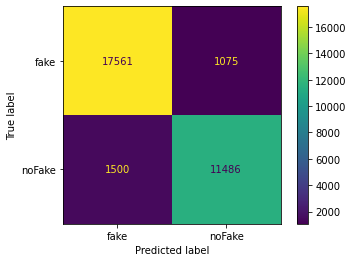

In [9]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 2 y 3

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain60PostEvaluate.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.59 s, sys: 1.34 s, total: 2.92 s
Wall time: 10.2 s
CPU times: user 210 ms, sys: 455 ms, total: 665 ms
Wall time: 3.29 s
CPU times: user 246 ms, sys: 783 ms, total: 1.03 s
Wall time: 3.84 s
CPU times: user 2.32 ms, sys: 34.9 ms, total: 37.2 ms
Wall time: 39.6 ms
CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 3.41 ms
CPU times: user 1.58 ms, sys: 310 µs, total: 1.89 ms
Wall time: 3.05 ms
CPU times: user 213 ms, sys: 631 ms, total: 844 ms
Wall time: 3.34 s
CPU times: user 182 ms, sys: 492 ms, total: 674 ms
Wall time: 3.3 s
CPU times: user 334 ms, sys: 583 ms, total: 918 ms
Wall time: 3.94 s
CPU times: user 2.14 ms, sys: 564 µs, total: 2.7 ms
Wall time: 4.92 ms
CPU times: user 926 µs, sys: 0 ns, total: 926 µs
Wall time: 3.81 ms
CPU times: user 1.68 ms, sys: 0 ns, total: 1.68 ms
Wall time: 2.77 ms


In [3]:
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 10s - 10s/epoch - 10ms/step
31622
acc: 0.9300170767187401
precision: 0.929441930267503
recall: 0.9256139208413955
f1: 0.9300170767187401


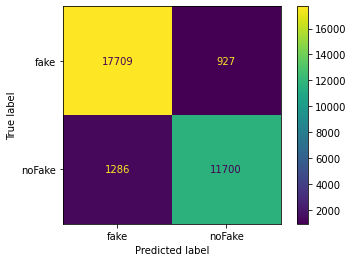

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 10s - 10s/epoch - 10ms/step
31622
acc: 0.930080323825185
precision: 0.9293226006277686
recall: 0.925877698230799
f1: 0.930080323825185


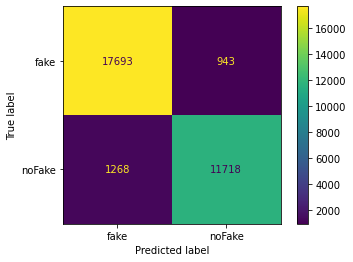

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 2


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp2.pt')

CPU times: user 2.82 s, sys: 2.58 s, total: 5.4 s
Wall time: 12.9 s
CPU times: user 511 ms, sys: 1.03 s, total: 1.54 s
Wall time: 19.6 s
CPU times: user 452 ms, sys: 927 ms, total: 1.38 s
Wall time: 24.1 s
CPU times: user 3.57 ms, sys: 964 µs, total: 4.53 ms
Wall time: 4.84 s
CPU times: user 2.04 ms, sys: 678 µs, total: 2.72 ms
Wall time: 1.27 s
CPU times: user 1.76 ms, sys: 681 µs, total: 2.44 ms
Wall time: 572 ms


Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModelo()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 0.4820 - categorical_accuracy: 0.7543
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1423 - categorical_accuracy: 0.9504
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0902 - categorical_accuracy: 0.9708
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0604 - categorical_accuracy: 0.9795
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0385 - categorical_accuracy: 0.9880
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0357 - categorical_accuracy: 0.9887
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0271 - categorical_accuracy: 0.9921
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0195 - categorical_accuracy: 0.9948
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0170 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 4s 6ms/step - loss: 0.4979 - categorical_accuracy: 0.8955
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1417 - categorical_accuracy: 0.9463
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1078 - categorical_accuracy: 0.9595
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0816 - categorical_accuracy: 0.9710
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0594 - categorical_accuracy: 0.9794
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0420 - categorical_accuracy: 0.9862
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0277 - categorical_accuracy: 0.9914
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0176 - categorical_accuracy: 0.9946
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0107 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 5ms/step - loss: 0.4102 - categorical_accuracy: 0.9156
Epoch 2/20
744/744 [==============================] - 4s 5ms/step - loss: 0.1248 - categorical_accuracy: 0.9569
Epoch 3/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0925 - categorical_accuracy: 0.9676
Epoch 4/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0676 - categorical_accuracy: 0.9777
Epoch 5/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0465 - categorical_accuracy: 0.9857
Epoch 6/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0300 - categorical_accuracy: 0.9915
Epoch 7/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0177 - categorical_accuracy: 0.9956
Epoch 8/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0101 - categorical_accuracy: 0.9979
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0055 - categorical_accuracy:

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain60.h5')

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain60.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.53 s, sys: 1.36 s, total: 2.89 s
Wall time: 9.3 s
CPU times: user 214 ms, sys: 459 ms, total: 674 ms
Wall time: 3.29 s
CPU times: user 227 ms, sys: 843 ms, total: 1.07 s
Wall time: 3.88 s
CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 5.25 ms
CPU times: user 1.75 ms, sys: 0 ns, total: 1.75 ms
Wall time: 3.08 ms
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 2.82 ms
CPU times: user 131 ms, sys: 791 ms, total: 921 ms
Wall time: 19.4 s
CPU times: user 96.7 ms, sys: 1.18 s, total: 1.28 s
Wall time: 17.9 s
CPU times: user 92.8 ms, sys: 1.14 s, total: 1.24 s
Wall time: 15.7 s
CPU times: user 6.02 ms, sys: 1.75 ms, total: 7.78 ms
Wall time: 843 ms
CPU times: user 8.13 ms, sys: 0 ns, total: 8.13 ms
Wall time: 852 ms
CPU times: user 5.79 ms, sys: 0 ns, total: 5.79 ms
Wall time: 787 ms


In [3]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [6]:
#validacion
import numpy as np
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 7s - loss: 0.8027 - categorical_accuracy: 0.9175 - 7s/epoch - 16ms/step
469/469 - 3s - loss: 0.7330 - categorical_accuracy: 0.9206 - 3s/epoch - 6ms/step
475/475 - 2s - loss: 0.7951 - categorical_accuracy: 0.9170 - 2s/epoch - 5ms/step


[0.7950673699378967, 0.9170291423797607]

In [7]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain60PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 5ms/step
31622
acc: 0.9175890203023211
precision: 0.9151251192883338
recall: 0.9144978253034366
f1: 0.9175890203023211


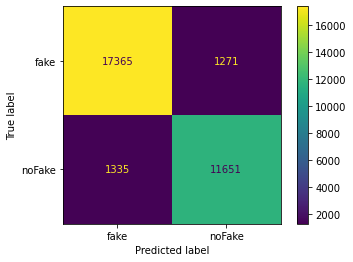

In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 1 y 3

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain60PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.43 s, sys: 1.35 s, total: 2.78 s
Wall time: 9.07 s
CPU times: user 220 ms, sys: 485 ms, total: 706 ms
Wall time: 3.3 s
CPU times: user 253 ms, sys: 831 ms, total: 1.08 s
Wall time: 3.87 s
CPU times: user 1.74 ms, sys: 842 µs, total: 2.58 ms
Wall time: 6.65 ms
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 4.47 ms
CPU times: user 1.5 ms, sys: 0 ns, total: 1.5 ms
Wall time: 3.45 ms
CPU times: user 248 ms, sys: 595 ms, total: 843 ms
Wall time: 3.34 s
CPU times: user 207 ms, sys: 467 ms, total: 674 ms
Wall time: 3.3 s
CPU times: user 341 ms, sys: 542 ms, total: 884 ms
Wall time: 3.98 s
CPU times: user 1.61 ms, sys: 410 µs, total: 2.02 ms
Wall time: 5.91 ms
CPU times: user 1.2 ms, sys: 153 µs, total: 1.36 ms
Wall time: 4.93 ms
CPU times: user 1.43 ms, sys: 18 µs, total: 1.45 ms
Wall time: 2.24 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9300487002719625
precision: 0.9282301613389018
recall: 0.9270882288509424
f1: 0.9300487002719625


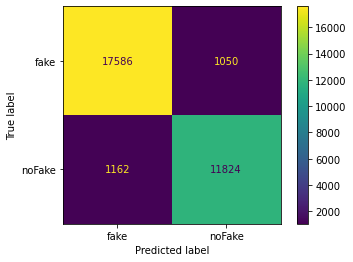

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9288786288027323
precision: 0.9267742431590742
recall: 0.9262005854572133
f1: 0.9288786288027323


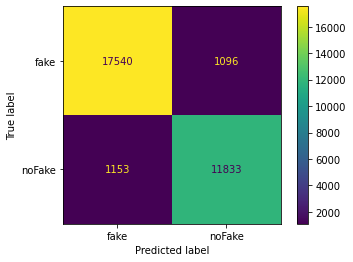

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp2.pt')

CPU times: user 2.86 s, sys: 2.63 s, total: 5.5 s
Wall time: 13.9 s
CPU times: user 481 ms, sys: 1.09 s, total: 1.57 s
Wall time: 19.6 s
CPU times: user 455 ms, sys: 1.03 s, total: 1.49 s
Wall time: 24.4 s
CPU times: user 2.07 ms, sys: 2.98 ms, total: 5.05 ms
Wall time: 5.52 s
CPU times: user 1.21 ms, sys: 835 µs, total: 2.05 ms
Wall time: 479 ms
CPU times: user 1.04 ms, sys: 1.04 ms, total: 2.08 ms
Wall time: 475 ms


Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModelo()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 0.4837 - categorical_accuracy: 0.7551
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1463 - categorical_accuracy: 0.9498
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0864 - categorical_accuracy: 0.9712
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0579 - categorical_accuracy: 0.9817
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0447 - categorical_accuracy: 0.9862
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0328 - categorical_accuracy: 0.9892
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0266 - categorical_accuracy: 0.9911
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0209 - categorical_accuracy: 0.9938
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0162 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4527 - categorical_accuracy: 0.8946
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1397 - categorical_accuracy: 0.9488
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1053 - categorical_accuracy: 0.9609
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0783 - categorical_accuracy: 0.9725
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0551 - categorical_accuracy: 0.9818
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0371 - categorical_accuracy: 0.9872
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0234 - categorical_accuracy: 0.9926
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0142 - categorical_accuracy: 0.9961
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0084 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4419 - categorical_accuracy: 0.9125
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1271 - categorical_accuracy: 0.9555
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0937 - categorical_accuracy: 0.9665
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0698 - categorical_accuracy: 0.9761
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0488 - categorical_accuracy: 0.9841
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0319 - categorical_accuracy: 0.9906
Epoch 7/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0191 - categorical_accuracy: 0.9949
Epoch 8/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0106 - categorical_accuracy: 0.9976
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0056 - categorical_accuracy:

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain60.h5')

In [1]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain60.h5')

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.26 s, sys: 1.33 s, total: 2.59 s
Wall time: 8.79 s
CPU times: user 235 ms, sys: 447 ms, total: 683 ms
Wall time: 4.12 s
CPU times: user 265 ms, sys: 837 ms, total: 1.1 s
Wall time: 4.14 s
CPU times: user 1.77 ms, sys: 371 µs, total: 2.14 ms
Wall time: 6.64 ms
CPU times: user 1.38 ms, sys: 176 µs, total: 1.56 ms
Wall time: 4.49 ms
CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 2.91 ms
CPU times: user 81.7 ms, sys: 1.15 s, total: 1.24 s
Wall time: 17.7 s
CPU times: user 147 ms, sys: 1.19 s, total: 1.34 s
Wall time: 25.6 s
CPU times: user 72.2 ms, sys: 1.17 s, total: 1.24 s
Wall time: 15.9 s
CPU times: user 6.29 ms, sys: 1.25 ms, total: 7.54 ms
Wall time: 852 ms
CPU times: user 6.51 ms, sys: 393 µs, total: 6.9 ms
Wall time: 1.04 s
CPU times: user 7.28 ms, sys: 9 µs, total: 7.29 ms
Wall time: 796 ms


In [3]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 7s - loss: 0.7503 - categorical_accuracy: 0.9160 - 7s/epoch - 15ms/step
469/469 - 2s - loss: 0.7521 - categorical_accuracy: 0.9147 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7442 - categorical_accuracy: 0.9180 - 2s/epoch - 4ms/step


[0.7441619038581848, 0.917951762676239]

In [6]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain60PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.917652267408766
precision: 0.915390695374137
recall: 0.9142830010240691
f1: 0.917652267408766


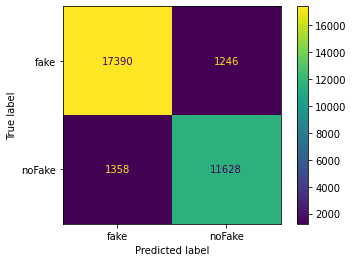

In [7]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')



#####Probando modelo en muestra 1 y 2

In [1]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain60PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.58 s, sys: 1.3 s, total: 2.87 s
Wall time: 6.64 s
CPU times: user 240 ms, sys: 436 ms, total: 676 ms
Wall time: 3.85 s
CPU times: user 270 ms, sys: 780 ms, total: 1.05 s
Wall time: 3.85 s
CPU times: user 1.39 ms, sys: 35.2 ms, total: 36.6 ms
Wall time: 40.7 ms
CPU times: user 1.47 ms, sys: 246 µs, total: 1.71 ms
Wall time: 5.17 ms
CPU times: user 1.45 ms, sys: 0 ns, total: 1.45 ms
Wall time: 3.92 ms
CPU times: user 260 ms, sys: 573 ms, total: 833 ms
Wall time: 3.35 s
CPU times: user 219 ms, sys: 447 ms, total: 665 ms
Wall time: 3.29 s
CPU times: user 340 ms, sys: 548 ms, total: 887 ms
Wall time: 4 s
CPU times: user 921 µs, sys: 12.4 ms, total: 13.3 ms
Wall time: 16 ms
CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 3.68 ms
CPU times: user 755 µs, sys: 796 µs, total: 1.55 ms
Wall time: 4.67 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9268863449497186
precision: 0.9249998731884346
recall: 0.9237632230420219
f1: 0.9268863449497186


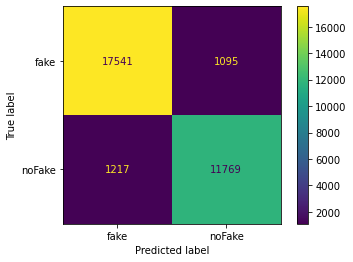

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 11s - 11s/epoch - 11ms/step
31622
acc: 0.9260957561191575
precision: 0.9241583402759375
recall: 0.9229757461326671
f1: 0.9260957561191575


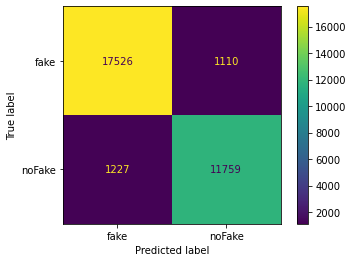

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

### Model Training

### Performance Metrics And Accuracy

Modelos con dropout

In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp2.pt')

CPU times: user 2.8 s, sys: 2.67 s, total: 5.47 s
Wall time: 14.3 s
CPU times: user 478 ms, sys: 1.02 s, total: 1.5 s
Wall time: 20.9 s
CPU times: user 440 ms, sys: 1.05 s, total: 1.49 s
Wall time: 24.6 s
CPU times: user 2.19 ms, sys: 2.58 ms, total: 4.77 ms
Wall time: 4.57 s
CPU times: user 1.97 ms, sys: 597 µs, total: 2.57 ms
Wall time: 440 ms
CPU times: user 1.98 ms, sys: 962 µs, total: 2.95 ms
Wall time: 449 ms


In [ ]:
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 197 ms, sys: 466 ms, total: 662 ms
Wall time: 5.35 s
CPU times: user 205 ms, sys: 428 ms, total: 634 ms
Wall time: 8.7 s
CPU times: user 222 ms, sys: 473 ms, total: 695 ms
Wall time: 12 s
CPU times: user 2.45 ms, sys: 513 µs, total: 2.96 ms
Wall time: 1.49 s
CPU times: user 1.87 ms, sys: 614 µs, total: 2.49 ms
Wall time: 456 ms
CPU times: user 2.05 ms, sys: 333 µs, total: 2.38 ms
Wall time: 477 ms
CPU times: user 18.6 ms, sys: 954 ms, total: 972 ms
Wall time: 12.7 s
CPU times: user 4.79 ms, sys: 955 ms, total: 960 ms
Wall time: 13.8 s
CPU times: user 3.2 ms, sys: 947 ms, total: 951 ms
Wall time: 16.9 s
CPU times: user 1.39 ms, sys: 926 µs, total: 2.31 ms
Wall time: 1.24 s
CPU times: user 2.3 ms, sys: 0 ns, total: 2.3 ms
Wall time: 489 ms
CPU times: user 1.93 ms, sys: 211 µs, total: 2.14 ms
Wall time: 497 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModeloDropout()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 8s 4ms/step - loss: 0.5251 - categorical_accuracy: 0.7271
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1661 - categorical_accuracy: 0.9396
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1070 - categorical_accuracy: 0.9639
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0721 - categorical_accuracy: 0.9760
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0508 - categorical_accuracy: 0.9835
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0403 - categorical_accuracy: 0.9879
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0319 - categorical_accuracy: 0.9900
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0246 - categorical_accuracy: 0.9929
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0199 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4789 - categorical_accuracy: 0.8976
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1561 - categorical_accuracy: 0.9459
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1168 - categorical_accuracy: 0.9590
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0940 - categorical_accuracy: 0.9678
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0740 - categorical_accuracy: 0.9756
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0586 - categorical_accuracy: 0.9807
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0452 - categorical_accuracy: 0.9862
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0342 - categorical_accuracy: 0.9893
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0250 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 3s 4ms/step - loss: 0.4053 - categorical_accuracy: 0.9110
Epoch 2/20
744/744 [==============================] - 3s 4ms/step - loss: 0.1494 - categorical_accuracy: 0.9475
Epoch 3/20
744/744 [==============================] - 3s 4ms/step - loss: 0.1124 - categorical_accuracy: 0.9600
Epoch 4/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0886 - categorical_accuracy: 0.9678
Epoch 5/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0693 - categorical_accuracy: 0.9759
Epoch 6/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0523 - categorical_accuracy: 0.9828
Epoch 7/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0381 - categorical_accuracy: 0.9880
Epoch 8/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0278 - categorical_accuracy: 0.9922
Epoch 9/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0199 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [ ]:
modelo1

In [ ]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 2s - loss: 0.6333 - categorical_accuracy: 0.9185
469/469 - 1s - loss: 0.6575 - categorical_accuracy: 0.9169
475/475 - 1s - loss: 0.6413 - categorical_accuracy: 0.9151


[0.6413355469703674, 0.915052056312561]

989/989 - 2s
31622
acc: 0.9166403137056479
precision: 0.9143256783828433
recall: 0.9132610227263749
f1: 0.9166403137056479


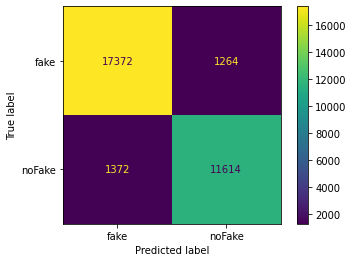

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModeloDropout()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModeloDropout()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

